### Supervised Machine Learning Techniques Assignment I

### Mortgage Default Risk & Fraud Detection

### Author: Chloe Du (jd3631)

#### Part 1: Review the data

In [1]:
#import necessary libraries
import numpy as np 
import pandas as pd

from scipy import stats  #for some statistics
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

import warnings 
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn  #ignore warnings (from sklearn and seaborn)

There are 80,000 distinct mortgage loan applicants and there are 89 different features.

There are many missing data in the whole dataset. We will deal with these missing values later.

The most common operation used when applying for loan is h5, and the most comman mobile brand used is web.

The target value is loan_default. This indicates if a client will default mortage loan in the future. As the value 0 for default payment means not default and value 1 means default, the mean of 0.1936 means that there are 19.36% of mortgage loan contracts that will default (will verify this in the next sections of this analysis).

We will explore in more detail the data in the following section.

In [2]:
# Now to import and put the dataset 
df = pd.read_csv("/Users/jiayangdu/Desktop/Columbia University /APAN 5420/XYZloan_default_selected_vars.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [3]:
##adjust the varibles, drop meaningless variables
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [4]:
#id has no meaning of value, so we convert it to categorical variables
df['id'] = df['id'].apply(lambda x:str(x))
#AP005 represents the datetime, so we need to convert it to datetime type
df['AP005'] = pd.to_datetime(df['AP005'])

df.info()
#there are some missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 87 columns):
id              80000 non-null object
loan_default    80000 non-null int64
AP001           80000 non-null int64
AP002           80000 non-null int64
AP003           80000 non-null int64
AP004           80000 non-null int64
AP005           80000 non-null datetime64[ns]
AP006           80000 non-null object
AP007           80000 non-null int64
AP008           80000 non-null int64
AP009           80000 non-null int64
TD001           80000 non-null int64
TD002           80000 non-null int64
TD005           80000 non-null int64
TD006           80000 non-null int64
TD009           80000 non-null int64
TD010           80000 non-null int64
TD013           80000 non-null int64
TD014           80000 non-null int64
TD015           80000 non-null int64
TD022           60402 non-null float64
TD023           72337 non-null float64
TD024           76306 non-null float64
TD025           77450 n

In [5]:
#replace -1,-99,-98,-999 to na, since these two strange values may be systematic default value
df.replace(-99.0,' ',inplace=True)
df.replace(-99,' ',inplace=True)
df.replace(-98.0,' ',inplace=True)
df.replace(-98,' ',inplace=True)
df.replace(-999,' ',inplace=True)
df.replace(-99.0,' ',inplace=True)
df.replace(-1,' ',inplace=True)

In [6]:
df.head() #missing values have been successfully replaced

,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,1,31,2,1,12,2017-07-06 10:21:00,ios,3,3,...,13,13,0,0,1449,1449,2249,2249,7.0,IPHONE7
1,2,0,27,1,1,12,2017-04-06 12:51:00,h5,5,4,...,,,,,,,,,NaN,WEB
2,3,0,33,1,4,12,2017-07-01 14:11:00,h5,4,2,...,3,2,33,0,33,0,143,110,8.0,WEB
3,4,0,34,2,4,12,2017-07-07 10:10:00,android,5,5,...,0,0,0,0,0,0,0,0,10.0,OPPO
4,5,0,47,2,1,12,2017-07-06 14:37:00,h5,4,4,...,,,,,,,,,NaN,WEB


In [7]:
#missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TD055,79999,0.999988
TD062,79999,0.999988
TD048,79999,0.999988
TD044,79997,0.999962
TD051,79995,0.999938
TD061,79990,0.999875
TD054,79988,0.999850
TD022,19598,0.244975
TD023,7663,0.095787
TD024,3694,0.046175


In [8]:
#from the above dataframe, we can see that there are some variables missing almost 100% values
#therefore, i will drop those variables which lose up to 99% values
df.drop(['TD055','TD062','TD048','TD044','TD051','TD061','TD054'],axis=1,inplace=True)
# for other columns containing missing values, we do not need to deal with them
# since in the following steps, we will bin some variables and missing values will be regarded as their own categories
# the tree-based algorithms will capture the information from nah values

In [9]:
#get statistics info about numerical variables
df.describe()

,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,TD029,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,...,78370.0,80000.000000,80000.000000,8.000000e+04,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,77207.000000
mean,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,0.727925,1.986962,0.706213,...,6.0,2.503450,1.595638,3.518711e+04,0.0,4.924750,5.234962,4.361112,6.199038,5.976272
std,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,0.445031,1.807445,0.918347,...,0.0,1.117991,1.083602,6.359684e+04,0.0,1.094305,2.398870,2.498607,3.359354,3.641814
min,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,...,6.0,1.000000,1.000000,0.000000e+00,0.0,2.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,0.000000,1.000000,0.000000,...,6.0,2.000000,1.000000,4.700000e+03,0.0,5.000000,3.000000,2.000000,3.000000,3.000000
50%,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,1.000000,2.000000,0.000000,...,6.0,2.000000,1.000000,1.728500e+04,0.0,5.000000,6.000000,4.000000,5.000000,5.000000
75%,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,1.000000,3.000000,1.000000,...,6.0,4.000000,2.000000,4.075000e+04,0.0,6.000000,8.000000,7.000000,10.000000,8.000000
max,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,1.000000,20.000000,11.000000,...,6.0,4.000000,6.000000,1.420300e+06,0.0,6.000000,8.000000,8.000000,12.000000,47.000000


In [10]:
#since after replacing, some numerical categories will become categorical
#so we should convert the data types
df_cat = df.describe(include=['O']).drop(['id','MB007','AP006'],axis=1)
num_columns = df_cat.columns
for col in num_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
#Take a quick look at some basic categorical data
df.describe(include=['O'])
#we can see there is no duplicate applicants 
#h5 is the most common operation system 
#web is the most common operation device

,id,AP006,MB007
count,80000,80000,80000
unique,80000,4,112
top,41657,h5,WEB
freq,1,44246,43850


##### datetime variable

In [11]:
#we cannot employ any DateTime field of the yymmdd:hhmmss format in any tree-based methods. 
# derive year, month, day, weekday, etc. from this field.
df = df.assign(hour=df.AP005.dt.hour,
               day=df.AP005.dt.day,
               month=df.AP005.dt.month,
               year=df.AP005.dt.year)

In [12]:
df['DayofWeek']=df['AP005'].apply(lambda x:x.dayofweek)

In [13]:
#drop unwanted columns
df.drop('AP005',axis=1,inplace=True)

#### Part 2: Target Variable

 Note: our target variable is "loan_default", so we have a logistic problem (0 or 1)

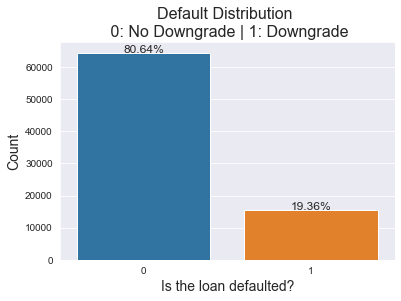

In [14]:
#Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plot_tr = sns.countplot(x='loan_default', data=df)
plot_tr.set_title("Default Distribution \n 0: No Downgrade | 1: Downgrade", fontsize=16)
plot_tr.set_xlabel("Is the loan defaulted?", fontsize=14)
plot_tr.set_ylabel('Count', fontsize=14)
total = len(df)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 

A 20% target incidence considering the amount of data in the dataset could work, however the proportion is still very small and I consider it to be imbalanced. Hence, I will implement data augmentation techniques in order to boost the target incidence with synthetic data. 

###  Modelling

In [15]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 hours 46 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_jiayangdu_bdarss
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.233 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [16]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML

### Model 1: GLM

In [17]:
# To copy the dataset for this modelling
df1 = df.copy()

#### Outliers flooring or capping

calculate 99% and 1% percentile as cap and floor for each column, the if value >= 99% percentile then redefine the value as the value of 99% percentile; similarly if value <= 1% percentile then redefine value as the value of 1% percentile

In [18]:
###find out those numerical variables
###make it easier for the following steps (binning continuous variables)
numerical_columns = ['MB005','CD173','CD172','CD170','CD169','CD167','CD166',
                 'CD164','CD162','CD160','CD153','CD152','CD137','CD136',
                 'CD135','CD133','CD132','CD131','CD130','CD123','CD121',
                 'CD120','CD118','CD117','CD115','CD114','CD113','CD108',
                 'CD107','CD106','CD101','CD100','CD088','CD072','CD071',
                 'CD018','CD008','PA031','PA030','PA029','PA028','PA023',
                 'PA022','CR019','CR018','CR017','CR015','CR012','CR009','CR005',
                 'CR004','TD029','TD028','TD027','TD026','TD025','TD024','TD023',
                 'TD022','TD015','TD014','TD013','TD010','TD009','TD006','TD005',
                 'TD002','TD001','AP004']

In [19]:
for col in numerical_columns:
    percentiles = df1[col].quantile([0.01,0.99]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

#### missing values

Different from tree-based methods, missing values are not handled and rows with any missing values will be omitted from the data set by GLM on h2o. Therefore, we need to impute missing values up front if there are many.

Then use fillna() to impute the missing values with the median values(not use mean since mean is influenced by outliers). Use the for-loop function to impute missing values for those columns.

In [20]:
def null_cell(df):
    missing_values = df.isnull().sum()
    missing_values_per = df.isnull().sum() / df.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df1)).index
fill_list

Index(['PA030', 'PA023', 'PA031', 'PA029', 'PA022', 'PA028', 'TD022', 'TD023',
       'TD024', 'CD018', 'CD008', 'CD131', 'CD130', 'CD123', 'CD121', 'CD133',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD132', 'CD136', 'CD135', 'CD160',
       'CD173', 'CD172', 'CD170', 'CD169', 'CD167', 'CD120', 'CD164', 'CD162',
       'CD166', 'CD153', 'CD152', 'CD137', 'CD118', 'MB005', 'TD025', 'TD026',
       'TD027', 'TD028', 'TD029'],
      dtype='object')

In [21]:
for col in fill_list:
    df1.loc[:,col].fillna(df1.loc[:,col].median(),inplace=True)

In [22]:
#missing values
sum(df1.isnull().sum()) #we've gotten rid of all our NAs

0

#### Categorical variables

"Letting GLM handle categorical columns is better, as it can take advantage of the categorical column for better performance and memory utilization. We strongly recommend avoiding one-hot encoding categorical columns with many levels into many binary columns, as this is very inefficient. This is especially true for Python users who are used to expanding their categorical variables manually for other frameworks."

h2o will automatically expands categoricals into 1-hot encoded binary vectors

reference:https://www.h2o.ai/wp-content/uploads/2018/01/GLM-BOOKLET.pdf

In [23]:
df1.dtypes.value_counts()

float64    52
int64      29
object      3
dtype: int64

In [24]:
# subcategories within categorical data
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0) # mb007 has too many 

id       80000
AP006        4
MB007      112
dtype: int64

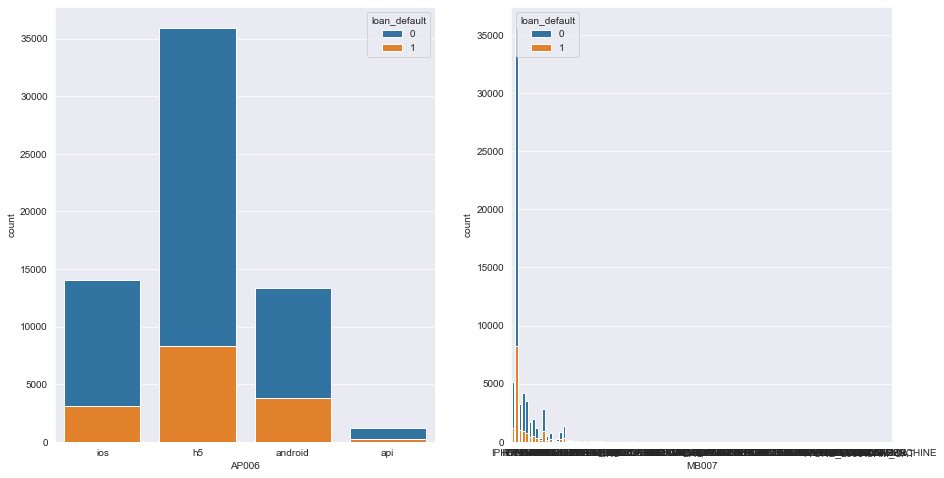

In [25]:
# explorary on categorical features
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x='AP006',hue='loan_default', data=df1,dodge=False, ax=axes[0])
sns.countplot(x='MB007',hue='loan_default', data=df1,dodge=False, ax=axes[1])

In [38]:
#Create list with categorical features' names.
#AP003 education level
nonum_feats_names = ['month', 'hour', 'day', 'year', 'DayofWeek', 'AP006', 'MB007','AP003']
#Assign appropriate data type to categorical variables.
nonum_feats = df1[nonum_feats_names].astype('category')
nonum_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
month        80000 non-null category
hour         80000 non-null category
day          80000 non-null category
year         80000 non-null category
DayofWeek    80000 non-null category
AP006        80000 non-null category
MB007        80000 non-null category
AP003        80000 non-null category
dtypes: category(8)
memory usage: 634.3 KB


In [39]:
#One-hot-code categorical variables and dropping the reference value.
ohc_feats = pd.get_dummies(nonum_feats,drop_first=True)
ohc_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 181 entries, month_4 to AP003_6
dtypes: uint8(181)
memory usage: 13.8 MB


In GLM or Deep Learning, H2O will one-hot encode the categoricals automatically under the hood -- either way you don't need to do any pre-processing. However, for the oversampling step whcih only deals with numericals (I managed to use smotenc which deals with both categoricals and numericals later, but something went wrong ), I still mannually create dummies here. 

#### numerical variables

When GLM performs regression (with factor columns), one category can be left out to avoid multicollinearity. If regularization is disabled (lambda = 0), then one category is left out. However, when using a the default lambda parameter, all categories are included.

The reason for the different behavior with regularization is that collinearity is not a problem with regularization. And it’s better to leave regularization to find out which level to ignore (or how to distribute the coefficients between the levels).

reference: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html#handling-of-categorical-variables

exploratory on the correlation between numerical variables

In [45]:
num_cols_names = list(set(list(df1.columns)).difference(set(nonum_feats_names)))
num_cols_names.remove('loan_default')
num_cols_names.remove('id')

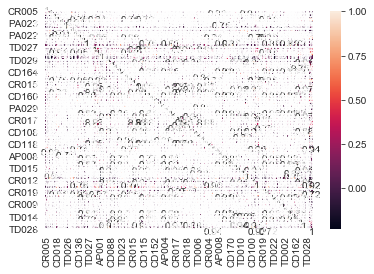

In [46]:
corrmat = df1[num_cols_names].corr()
sns.heatmap(corrmat, annot = True)

#### Scaling the data

The scaling method I chose represents each column in values from 0 to 1 according to their relative values. It creates less variance in data and smoothes it out to relative values making them easier to compare to each other.

In [48]:
df_1 = pd.concat([df1[num_cols_names], ohc_feats],axis=1) #df_1 do not contain target variable

In [49]:
# Define what type of scaling we will use 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [50]:
# Fit scaler to our data
scaler.fit(df_1[num_cols_names])

MinMaxScaler()

In [51]:
# Calculate scaled values and store them in a separate object
df_1[num_cols_names] = scaler.transform(df1[num_cols_names])

#### predictor and target

In [52]:
var = pd.DataFrame(df_1.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head(10)

,varname,dtype,source
0,CR005,float64,CR
1,TD009,float64,TD
2,AP002,float64,AP
3,CD018,float64,CD
4,PA023,float64,PA
5,AP007,float64,AP
6,TD026,float64,TD
7,TD024,float64,TD
8,PA022,float64,PA
9,CD136,float64,CD


In [53]:
var['source'].value_counts()

MB    112
CD     36
da     30
ho     23
TD     17
AP     13
CR      8
Da      6
PA      6
mo      4
Name: source, dtype: int64

In [55]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
# other remaining variables to get a dummy list
other_list = list(set(list(df_1.columns)).difference(set(MB_list+AP_list+TD_list+CR_list+PA_list+CD_list)))

In [56]:
predictors = MB_list + TD_list + AP_list + CD_list + CR_list + PA_list + other_list
target='loan_default'

#### oversampling

SMOTE-NC

For this project I managed to Synthetic Minority Over-sampling Technique for Nominal and Continuous features (SMOTE-NC) from the imbalanced-learn library, which creates synthetic data for categorical as well as quantitative features in the data set. SMOTE-NC slightly changes the way a new sample is generated by performing something specific for the categorical features. In fact, the categories of a new generated sample are decided by picking the most frequent category of the nearest neighbors present during the generation. 

reference: https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25

However, it does not work in my cases, I have no idea about how to adjust it, so I just left the code as below.

In [72]:
##Obatin column index for categorical features
cat_col_index = np.argwhere(df1.columns.isin(nonum_feats_names)).ravel()
print(cat_col_index)

[ 4  6 78 79 80 81 82 83]


In [75]:
#from imblearn.over_sampling import SMOTENC
#from collections import Counter

#X = df1.drop('loan_default',axis=1)
#y = df1[target]

#Instantiate SMOTENC algorith with 60% oversampling
#sm = SMOTENC(categorical_features= cat_col_index, random_state=123)
#X_rs, y_rs = sm.fit_resample(X,y)

#print('Random undersampling {}'.format(Counter(y_rs)))

In [76]:
# therefore, i tried smote
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_1[predictors]
y = df1[target]

oversample = SMOTE()
X_rs, y_rs = oversample.fit_resample(X,y)

print('Random undersampling {}'.format(Counter(y_rs)))

Random undersampling Counter({1: 64512, 0: 64512})


In [77]:
y_rs = y_rs.to_frame()

In [78]:
df1_oversample = X_rs.copy()
df1_oversample['loan_default'] = y_rs['loan_default'].tolist()

#### train test split

In [79]:
#train test split 7:3
from sklearn.model_selection import train_test_split
train,test = train_test_split(df1_oversample, test_size=0.30, random_state=42)
print('train:',len(train));print('test:', len(test))

train: 90316
test: 38708


#### modelling

##### run with a small sample dataset

In [82]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [83]:
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) # compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [84]:
glm_v1.predict(test_hex)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.421622,0.578378
0,0.72542,0.27458
1,0.476902,0.523098
0,0.63294,0.36706
0,0.872081,0.127919
1,0.256359,0.743641
1,0.439554,0.560446
1,0.445731,0.554269
0,0.767923,0.232077
0,0.814803,0.185197


In [85]:
glm_v1.predict(test_hex)['p1']

glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.578378
0.27458
0.523098
0.36706
0.127919
0.743641
0.560446
0.554269
0.232077
0.185197


In [86]:
predictions = glm_v1.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,loan_default,p1
0,1,0.578378
1,0,0.274580
2,0,0.523098
3,0,0.367060
4,0,0.127919


In [87]:
def createGains(model):
    predictions = model.predict(test_hex)['p1']
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v1)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,388,292,96,388,292,96,0.16,0.05,186.0,1.57,11.0,75.26
1,387,276,111,775,568,207,0.31,0.10,372.0,1.53,21.0,73.29
2,387,262,125,1162,830,332,0.45,0.17,558.0,1.49,28.0,71.43
3,387,247,140,1549,1077,472,0.58,0.23,744.0,1.45,35.0,69.53
4,387,211,176,1936,1288,648,0.69,0.32,930.0,1.38,37.0,66.53
5,387,187,200,2323,1475,848,0.79,0.42,1116.0,1.32,37.0,63.50
6,387,136,251,2710,1611,1099,0.87,0.55,1302.0,1.24,32.0,59.45
7,387,124,263,3097,1735,1362,0.93,0.68,1488.0,1.17,25.0,56.02
8,387,76,311,3484,1811,1673,0.97,0.83,1674.0,1.08,14.0,51.98


glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



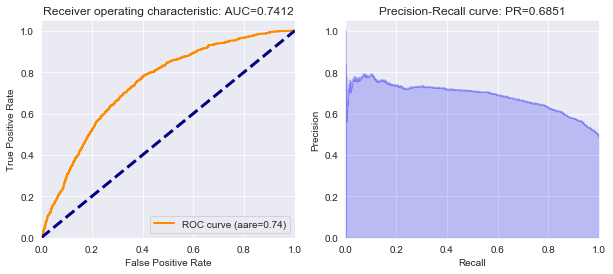

In [88]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()
    
ROC_AUC(glm_v1,test_hex,'loan_default')

In [89]:
# Print the Coefficients table
coefs = glm_v1._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)
#glm did automatically delt with categoricals

,names,coefficients,standardized_coefficients
162,AP004,1.238482,0.262248
53,TD013,0.735834,0.154460
45,TD009,0.361749,0.076233
50,TD005,0.227438,0.046289
48,TD001,0.119937,0.024716
...,...,...,...
57,AP002,-0.106369,-0.047642
141,hour_8,-0.327530,-0.051490
1,MB005,-0.372240,-0.075689
65,AP003_3,-0.511553,-0.221945


#### parameter tunning

##### lambda search

In [90]:
#try using the `lambda_search` parameter (boolean):
# initialize the estimator then train the model
bestlam_glm = H2OGeneralizedLinearEstimator(family= "binomial", lambda_search = True)
bestlam_glm.train(x=predictors, y=target,training_frame= train_hex,validation_frame= test_hex)

# print the mse for the validation data
print(bestlam_glm.mse(valid=True))

glm Model Build progress: |███████████████████████████████████████████████| 100%
0.13188079074259593


glm prediction progress: |████████████████████████████████████████████████| 100%
   loan_default        p1
0             1  0.967420
1             0  0.041042
2             0  0.369286
3             0  0.117709
4             0  0.022486
glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



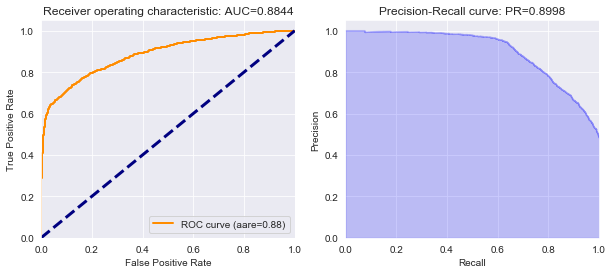

In [91]:
#predict using the above model
c = bestlam_glm.predict(test_hex)
predictions = c['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
print(test_scores.head())
ROC_AUC(bestlam_glm,test_hex,'loan_default')

If we use the built-in lamda function, in my case, the performance has been improved a lot.

##### grid (lambda, alpha) search

In [92]:
# select the values for lambda to grid over
from h2o.grid.grid_search import H2OGridSearch
hyper_params = {'lambda': list(np.arange(0.001,1,0.01)),
               'alpha': list(np.arange(0.01,1,0.1))}

search_criteria_dim_reduction= {'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 100,
                   'max_models': 5,
                   'stopping_metric': "auto",
                   'stopping_tolerance': 0.001,
                   'stopping_rounds': 5,
                   'seed': 1234}

glm_v2 = H2OGeneralizedLinearEstimator(family= "binomial",nfolds = 5,balance_classes = True)


# Train and validate a cartesian grid of GLMs
grid = H2OGridSearch(model = glm_v2,hyper_params=hyper_params,search_criteria=search_criteria_dim_reduction)

grid.train(x=predictors, y=target,training_frame= train_hex,validation_frame= test_hex)

# Get the grid results, sort the grid models by decreasing AUC
grid_table = grid.get_grid(sort_by = 'auc', decreasing = True)
print(grid_table)

best = grid_table.models[0]
best_lambda = best.actual_params['lambda']
best_alpha = best.actual_params['alpha']
print(best_lambda)
print(best_alpha)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
                    alpha                 lambda  \
0                  [0.01]  [0.12099999999999998]   
1                  [0.01]  [0.38099999999999995]   
2    [0.7100000000000001]  [0.27099999999999996]   
3                  [0.91]   [0.6409999999999999]   
4    [0.7100000000000001]   [0.8609999999999999]   

                                                               model_ids  \
0  Grid_GLM_Key_Frame__upload_a3ea6ad44d3ccdfe75b175de0d8441aa.hex_mo...   
1  Grid_GLM_Key_Frame__upload_a3ea6ad44d3ccdfe75b175de0d8441aa.hex_mo...   
2  Grid_GLM_Key_Frame__upload_a3ea6ad44d3ccdfe75b175de0d8441aa.hex_mo...   
3  Grid_GLM_Key_Frame__upload_a3ea6ad44d3ccdfe75b175de0d8441aa.hex_mo...   
4  Grid_GLM_Key_Frame__upload_a3ea6ad44d3ccdfe75b175de0d8441aa.hex_mo...   

                   auc  
0   0.8369172783528126  
1   0.7883013467719585  
2   0.4856139911449591  
3   0.4836462914686528  
4  0.48235829845759576  

glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.642253
0.186811
0.405142
0.324332
0.138885
0.877848
0.706493
0.529823
0.24939
0.167293



glm prediction progress: |████████████████████████████████████████████████| 100%
   loan_default        p1
0             1  0.642253
1             0  0.186811
2             0  0.405142
3             0  0.324332
4             0  0.138885
glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



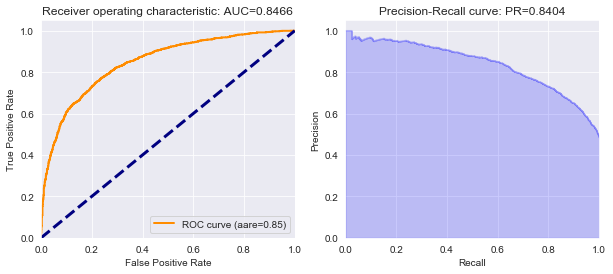

In [93]:
#try the above parameters
glm_v2 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = best_lambda, alpha = best_alpha) # compute_p_values = True)
glm_v2.train(predictors,target,training_frame=train_hex)
#predict using the above model
glm_v2.predict(test_hex)
print(glm_v2.predict(test_hex)['p1'])
predictions = glm_v2.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
print(test_scores.head())
ROC_AUC(glm_v2,test_hex,'loan_default')

Compared to the initial model, the AUC performance as well as PR worked better with lambda_search.

#### Now the code works fine with the small dataset, we can model with the entire dataset

In [94]:
df1_hex = h2o.H2OFrame(df_1)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.44975
0.431068
0.737734
0.434242
0.665413
0.463105
0.704751
0.571002
0.690974
0.269045



glm prediction progress: |████████████████████████████████████████████████| 100%
   loan_default        p1
0             0  0.449750
1             1  0.431068
2             1  0.737734
3             1  0.434242
4             1  0.665413
glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



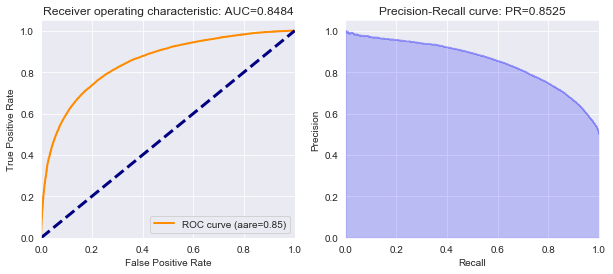

In [95]:
###using the parameter tuned by grid search
glm_v3 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = best_lambda, alpha = best_alpha) # compute_p_values = True)
glm_v3.train(predictors,target,training_frame=train_hex)
glm_v3.predict(test_hex)
print(glm_v3.predict(test_hex)['p1'])
predictions = glm_v3.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
print(test_scores.head())
ROC_AUC(glm_v3,test_hex,'loan_default')

glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.341533
0.188376
0.990259
0.193494
0.964127
0.378808
0.986496
0.885791
0.97596
0.0986703



glm prediction progress: |████████████████████████████████████████████████| 100%
   loan_default        p1
0             0  0.341533
1             1  0.188376
2             1  0.990259
3             1  0.193494
4             1  0.964127
glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



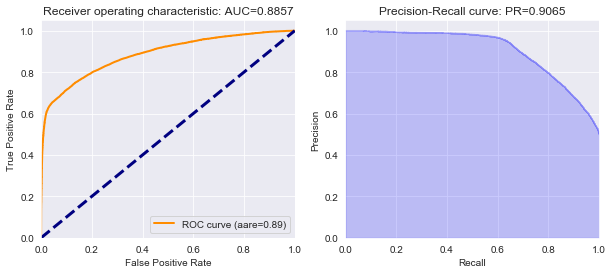

In [96]:
#using the lambda search
glm_v4 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_search = True) # compute_p_values = True)
glm_v4.train(predictors,target,training_frame=train_hex)
glm_v4.predict(test_hex)
print(glm_v4.predict(test_hex)['p1'])
predictions = glm_v4.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
print(test_scores.head())
ROC_AUC(glm_v4,test_hex,'loan_default')

Obviously, in my case,'lambda search'produces better performance.And PR has been largely improved as well. 

In [97]:
#gain tables
createGains(glm_v4)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3871,3847,24,3871,3847,24,0.20,0.00,1930.2,1.99,20.0,99.38
1,3871,3810,61,7742,7657,85,0.40,0.00,3860.4,1.98,40.0,98.90
2,3871,3618,253,11613,11275,338,0.58,0.02,5790.6,1.95,56.0,97.09
3,3871,2395,1476,15484,13670,1814,0.71,0.09,7720.8,1.77,62.0,88.28
4,3870,1762,2108,19354,15432,3922,0.80,0.20,9651.0,1.60,60.0,79.74
5,3871,1332,2539,23225,16764,6461,0.87,0.33,11581.2,1.45,54.0,72.18
6,3871,1006,2865,27096,17770,9326,0.92,0.48,13511.4,1.32,44.0,65.58
7,3871,738,3133,30967,18508,12459,0.96,0.64,15441.6,1.20,32.0,59.77
8,3871,487,3384,34838,18995,15843,0.98,0.82,17371.8,1.09,16.0,54.52


Here we can see the lift in the first decile is almost 2. This suggests the model allows addressing almost two times more targets for this group, compared with addressing without the model, that is randomly. The first group covered 99% applicants who are loan defaulters, using no model we should inspect 50% defaulters and using the given model we should get almost 100% defaulters. 

(Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set. )

In [98]:
# Print the Coefficients table
coefs = glm_v4._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
0,Intercept,10.030867,0.483929
212,AP004,2.057870,0.423248
145,CD114,2.049394,0.275768
103,TD013,1.072638,0.227251
158,CR018,0.557112,0.165958
...,...,...,...
192,hour_11,-3.857728,-0.963473
189,hour_15,-3.892653,-0.982071
40,MB007_IPHONE8,-4.596986,-1.072948
39,MB007_IPHONE7,-4.502457,-1.170518


### Model 2: AutoML

Automated machine learning can be thought of as the standard machine learning process with the automation of some of the steps involved. AutoML very broadly includes:

Automating certain parts of data preparation, e.g. imputation, standardization, feature selection, etc.

Being able to generate various models automatically, e.g. random grid search, Bayesian Hyperparameter Optimization, etc.

Getting the best model out of all the generated models, which most of the time is an Ensemble, e.g. ensemble selection, stacking, etc.

In [124]:
# To copy the dataset for this modelling
df2 = df.copy()

#### outliers: 
Since we will use tree-based algorithems which treat continuous variable as categorical variable as well, so the these modles are not sensitive to outliers at all and we do not need to cap or floor outliers here.

#### missing values

Same with the data preprocessing for the previous tree-based algorithem.we just need to bin them 

In [125]:
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PA030,69801,0.872513
PA023,57919,0.723988
PA031,57919,0.723988
PA029,55001,0.687512
PA022,52554,0.656925
PA028,52554,0.656925
TD022,19598,0.244975
TD023,7663,0.095787
TD024,3694,0.046175
CD115,3688,0.046100


In [126]:
# then we should notice variable PA030,PA031,PA023,PA029,PA028,PA022 LOST MORE THAN 50% VALUES,
# when we look into these variables, we could find they do not carry any important information
# because they only have 1 value (0) across the whole data set.
# Therefore, I will drop them as well
#'TD025,026,027,028,029' and'CR012',
df2.drop(['PA030','PA031','PA023','PA029','PA028','PA022'],axis=1,inplace=True)

#### categoricals and numericals

In [127]:
#Create list with categorical features' names.
#AP003 education level (ordinal)
nonum_feats_names = ['month', 'hour', 'day', 'year', 'DayofWeek', 'AP006', 'MB007','AP003']
#Create list with numerical features' names.
num_cols_names = list(set(list(df2.columns)).difference(set(nonum_feats_names)))
num_cols_names.remove('loan_default')
num_cols_names.remove('id')

#### binning numbericals

In [128]:
#binning numbericals
#we use cut and qcut to convert a numerical column into a categorical one,
#perhaps to make it better suited for a machine learning model (in case of a fairly skewed numerical column), or just for better analyzing the data at hand. 
for col in num_cols_names:
    df2[col] = pd.qcut(df2[col],10,duplicates='drop',labels=False)

In [129]:
#check missing values again 
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
TD028,80000,1.000000
TD025,80000,1.000000
TD026,80000,1.000000
TD027,80000,1.000000
TD029,80000,1.000000
CR012,80000,1.000000
TD022,19598,0.244975
TD023,7663,0.095787
TD024,3694,0.046175
CD114,3688,0.046100


In [130]:
# then we should notice variable #'TD025,026,027,028,029' and'CR012',year are 100% missing values,
# when we look into these variables, we could find they do not carry any important information
# because they only have 1 value (0) across the whole data set.
# Therefore, I will drop them as well

####
##the NaN values are kept as NaNs in the output result as well, but it is ok, since the tree-based will treat them as categoricals
df2.drop(['TD025','TD026','TD027','TD028','TD029','year','CR012'],axis=1,inplace=True)

In [131]:
#update numerical features' names.
num_cols_names = list(set(list(df2.columns)).difference(set(nonum_feats_names)))

#### categorical variable

In [132]:
#Ap002 gender
# in oreder to standardlize, 
# change 1 to 0, 2 to 1
df2['AP002'] = df2['AP002'] - 1

#one-hot encoding (get dummies)
#One-hot-code categorical variables and dropping the reference value.
ohc_feats = pd.get_dummies(nonum_feats,drop_first=True)
ohc_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 181 entries, month_4 to AP003_6
dtypes: uint8(181)
memory usage: 13.8 MB


In [133]:
df_2 = pd.concat([df2[num_cols_names], ohc_feats],axis=1) #df2 do not contain target variable

In [134]:
#fill na with median as well
def null_cell(df):
    missing_values = df.isnull().sum()
    missing_values_per = df.isnull().sum() / df.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df_2)).index
fill_list

Index(['TD022', 'TD023', 'TD024', 'CD153', 'CD162', 'CD133', 'CD172', 'CD173',
       'CD106', 'CD121', 'CD108', 'CD123', 'CD160', 'CD118', 'CD132', 'CD130',
       'CD135', 'CD167', 'CD170', 'CD100', 'CD008', 'CD152', 'CD115', 'CD113',
       'CD169', 'CD018', 'CD136', 'CD166', 'CD120', 'CD137', 'CD107', 'CD088',
       'CD071', 'CD164', 'CD131', 'CD072', 'CD101', 'CD117', 'CD114', 'MB005'],
      dtype='object')

In [135]:
for col in fill_list:
    df_2.loc[:,col].fillna(df_2.loc[:,col].median(),inplace=True)

#### predictor and target

In [136]:
var = pd.DataFrame(df_2.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head(10)

,varname,dtype,source
0,CR005,int64,CR
1,TD009,int64,TD
2,AP002,int64,AP
3,CD018,float64,CD
4,AP007,int64,AP
5,TD024,float64,TD
6,CD136,float64,CD
7,CD166,float64,CD
8,CD120,float64,CD
9,CD137,float64,CD


In [137]:
var['source'].value_counts()

MB    112
CD     36
da     30
ho     23
AP     13
TD     12
CR      7
Da      6
mo      4
lo      1
id      1
Name: source, dtype: int64

In [138]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
# other remaining variables to get a other_list
other_list = list(set(list(df_2.columns)).difference(set(MB_list+AP_list+TD_list+CR_list+PA_list+CD_list)))

In [139]:
predictors = MB_list + TD_list + AP_list + CD_list + CR_list + PA_list + other_list
target='loan_default'

#### oversampling

In [140]:
sum(df_2.isna().sum())

0

In [141]:
from imblearn.over_sampling import ADASYN
from collections import Counter

X = df_2[predictors]
y = df2[target]

oversample = ADASYN()
X_rs, y_rs = oversample.fit_sample(X,y)

print('Random undersampling {}'.format(Counter(y_rs)))

Random undersampling Counter({0: 64512, 1: 62878})


In [142]:
y_rs = y_rs.to_frame()

df2_oversample = X_rs.copy()
df2_oversample['loan_default'] = y_rs['loan_default'].tolist()

#### train test split

In [143]:
#train test split 7:3
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2_oversample, test_size=0.30, random_state=42)
print('train:',len(train));print('test:', len(test))

train: 89173
test: 38217


#### modelling

In [144]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [145]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml_v1 = H2OAutoML(max_runtime_secs = 600, max_models=20, seed=1234) #set up 10min max runtime
aml_v1.train(predictors,target,training_frame=train_hex)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [146]:
aml_v1.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200802_142520,0.0961466,0.310075,0.0961466,0.206403,0.218185
StackedEnsemble_BestOfFamily_AutoML_20200802_142520,0.0964843,0.310619,0.0964843,0.20739,0.218776
GLM_1_AutoML_20200802_142520,0.101918,0.319246,0.101918,0.22841,0.224448
DeepLearning_1_AutoML_20200802_142520,0.102766,0.320572,0.102766,0.182701,0.225377
GBM_3_AutoML_20200802_142520,0.105919,0.325452,0.105919,0.235072,0.230619
GBM_1_AutoML_20200802_142520,0.106244,0.325951,0.106244,0.239878,0.230685
GBM_2_AutoML_20200802_142520,0.106464,0.326288,0.106464,0.237691,0.230665
GBM_5_AutoML_20200802_142520,0.106894,0.326946,0.106894,0.242855,0.229401
GBM_grid__1_AutoML_20200802_142520_model_1,0.108413,0.329261,0.108413,0.250105,0.232684
GBM_4_AutoML_20200802_142520,0.108442,0.329305,0.108442,0.23851,0.233928


In [147]:
#predict using leader model
pred = aml_v1.predict(test_hex)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.156729
0.108067
0.244134
0.879764
0.969602
0.938295
0.100895
0.941023
0.147083
0.994112


In [148]:
perf = aml_v1.leader.model_performance(test_hex)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09847804884320484
RMSE: 0.3138121234802837
MAE: 0.21031967584856842
RMSLE: 0.22074325586122984
R^2: 0.6060032207944808
Mean Residual Deviance: 0.09847804884320484
Null degrees of freedom: 3821
Residual degrees of freedom: 3808
Null deviance: 955.3446298121698
Residual deviance: 376.3831026787289
AIC: 2017.2697543065894


#### Ensemble Exploration

In [149]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml_v1.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

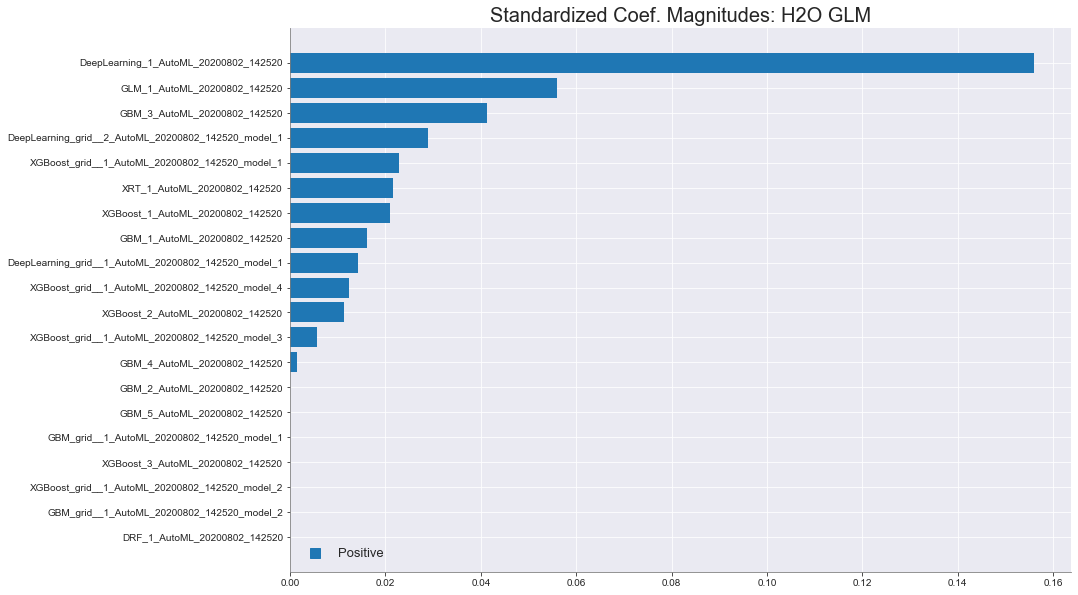

In [150]:
#The following shows us how much each base learner is contributing to the ensemble.
metalearner.std_coef_plot()

#### Evaluation

In [151]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(aml_v1)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,383,383,0,383,383,0,0.20,0.00,188.3,2.03,20.0,100.00
1,382,382,0,765,765,0,0.41,0.00,376.6,2.03,41.0,100.00
2,382,382,0,1147,1147,0,0.61,0.00,564.9,2.03,61.0,100.00
3,382,306,76,1529,1453,76,0.77,0.04,753.2,1.93,73.0,95.03
4,382,110,272,1911,1563,348,0.83,0.18,941.5,1.66,65.0,81.79
5,383,96,287,2294,1659,635,0.88,0.33,1129.8,1.47,55.0,72.32
6,382,77,305,2676,1736,940,0.92,0.48,1318.1,1.32,44.0,64.87
7,382,68,314,3058,1804,1254,0.96,0.65,1506.4,1.20,31.0,58.99
8,382,39,343,3440,1843,1597,0.98,0.82,1694.7,1.09,16.0,53.58


stackedensemble prediction progress: |████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



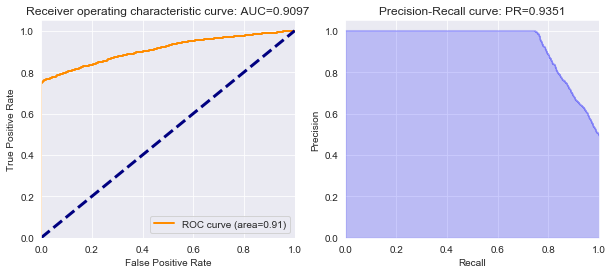

In [156]:
from sklearn import metrics
def ROC_AUC(my_result,df,target):

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,threshold = metrics.roc_curve(y_actual,y_pred) ###Calculate the true positive rate and the false positive rate
    roc_auc = metrics.auc(fpr,tpr) ###calculate auc
    
    # Precision-Recall
    average_precision = metrics.average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC curve
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)' % roc_auc) ###The false positive rate is the abscissa, and the true rate is the ordinate
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall curve
    plt.subplot(1,2,2)
    precision,recall,_ = metrics.precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

ROC_AUC(aml_v1,test_hex,'loan_default')

stackedensemble prediction progress: |████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



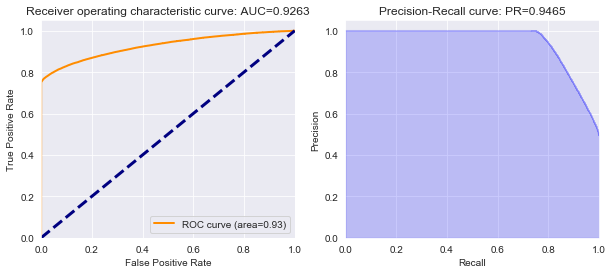

In [158]:
#simply detect overfitting
ROC_AUC(aml_v1,train_hex,'loan_default')
#If our model does much better on the training set than on the test set, 
#then we’re likely overfitting. in this case, it seems not overfitting.

###### Now the code works fine with the small dataset, we can model with the entire dataset

In [159]:
df2_hex = h2o.H2OFrame(df_2)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [160]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml_v2 = H2OAutoML(max_runtime_secs = 600, max_models=20, seed=1234) #set up 10min max runtime
aml_v2.train(predictors,target,training_frame=train_hex)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [161]:
aml_v2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200802_144156,0.0929037,0.304801,0.0929037,0.19766,0.213601
StackedEnsemble_BestOfFamily_AutoML_20200802_144156,0.0930472,0.305036,0.0930472,0.198102,0.214049
DeepLearning_1_AutoML_20200802_144156,0.0950007,0.308222,0.0950007,0.183299,nan
GBM_grid__1_AutoML_20200802_144156_model_1,0.0991503,0.314881,0.0991503,0.225924,0.220925
GLM_1_AutoML_20200802_144156,0.10009,0.31637,0.10009,0.225068,0.221136
XGBoost_grid__1_AutoML_20200802_144156_model_1,0.101121,0.317995,0.101121,0.213627,0.224149
XGBoost_1_AutoML_20200802_144156,0.107617,0.32805,0.107617,0.256374,0.233435
DeepLearning_grid__2_AutoML_20200802_144156_model_1,0.108281,0.329061,0.108281,0.260776,0.231189
XGBoost_3_AutoML_20200802_144156,0.116708,0.341625,0.116708,0.274264,0.242
GBM_grid__1_AutoML_20200802_144156_model_2,0.122763,0.350376,0.122763,0.306008,0.250392


In [162]:
#predict using leader model
pred = aml_v2.predict(test_hex)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.143019
0.954846
0.993304
0.249714
0.223808
0.139175
0.225523
0.220035
0.991092
0.232954


In [163]:
perf = aml_v2.leader.model_performance(test_hex)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09440839191189007
RMSE: 0.3072594862846224
MAE: 0.20679368035301593
RMSLE: 0.21882068295674495
R^2: 0.6222236418839804
Mean Residual Deviance: 0.09440839191189007
Null degrees of freedom: 38216
Residual degrees of freedom: 38207
Null deviance: 9551.491902578153
Residual deviance: 3608.005513696703
AIC: 18280.23878258907


stackedensemble prediction progress: |████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



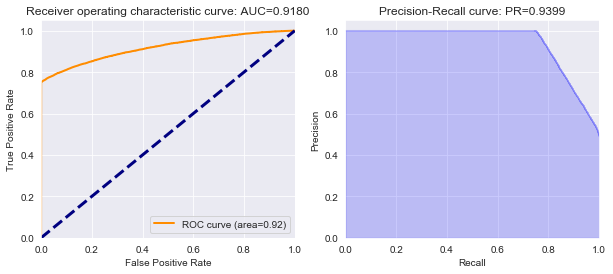

In [164]:
ROC_AUC(aml_v2,test_hex,'loan_default')

In [165]:
createGains(aml_v2)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3822,3822,0,3822,3822,0,0.20,0.00,1873.7,2.04,20.0,100.00
1,3822,3822,0,7644,7644,0,0.41,0.00,3747.4,2.04,41.0,100.00
2,3822,3822,0,11466,11466,0,0.61,0.00,5621.1,2.04,61.0,100.00
3,3821,3104,717,15287,14570,717,0.78,0.04,7494.8,1.94,74.0,95.31
4,3822,1200,2622,19109,15770,3339,0.84,0.17,9368.5,1.68,67.0,82.53
5,3822,925,2897,22931,16695,6236,0.89,0.32,11242.2,1.49,57.0,72.81
6,3821,727,3094,26752,17422,9330,0.93,0.48,13115.9,1.33,45.0,65.12
7,3822,583,3239,30574,18005,12569,0.96,0.65,14989.6,1.20,31.0,58.89
8,3822,480,3342,34396,18485,15911,0.99,0.82,16863.3,1.10,17.0,53.74


With the help of our model, we can target 100% of loan defaulters if the bank targets at 10% of its applicants. While with a random pick, we would be able to focus only on 50% of defaulters. the model allows addressing more than two times more targets for this group, compared with addressing without the model, that is randomly.

we finally got the best performance with auc of 0.91 and pr of 0.94. and the list in the top 30% is 2.04. 